# Multiclass and multioutput algorithms
https://scikit-learn.org/stable/modules/multiclass.html#
<img src='https://scikit-learn.org/stable/_images/multi_org_chart.png'>

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
from sklearn.utils.multiclass import type_of_target
import numpy as np

In [3]:
type_of_target([0.1, 0.6])

type_of_target([1, -1, -1, 1])

type_of_target(['a', 'b', 'a'])

type_of_target([1.0, 2.0])

type_of_target([1, 0, 2])

type_of_target([1.0, 0.0, 3.0])

type_of_target(['a', 'b', 'c'])

type_of_target(np.array([[1, 2], [3, 1]]))

type_of_target([[1, 2]])

type_of_target(np.array([[1.5, 2.0], [3.0, 1.6]]))

type_of_target(np.array([[0, 1], [1, 1]]))

'continuous'

'binary'

'binary'

'binary'

'multiclass'

'multiclass'

'multiclass'

'multiclass-multioutput'

'multilabel-indicator'

'continuous-multioutput'

'multilabel-indicator'

## <font color='purple'> 1.12.1. Multiclass classification
### 1.12.1.1. Target format

In [4]:
import numpy as np
y = np.array(['apple', 'pear', 'apple', 'orange'])
print(y)

['apple' 'pear' 'apple' 'orange']


In [5]:
from sklearn.preprocessing import LabelBinarizer
y = np.array(['apple', 'pear', 'apple', 'orange'])
y_dense = LabelBinarizer().fit_transform(y)
print(y_dense)

[[1 0 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]]


### 1.12.1.2. OneVsRestClassifier
- Binary Classification Problem 1: red vs [blue, green]
- Binary Classification Problem 2: blue vs [red, green]
- Binary Classification Problem 3: green vs [red, blue]

In [6]:
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

X, y = datasets.load_iris(return_X_y=True)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
OneVsRestClassifier(LinearSVC(random_state=0)).fit(X, y).predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### LogisticRegression(multi_class='ovr') =  OneVsRestClassifier(LogisticRegression())

In [8]:
# logistic regression for multi-class classification using built-in one-vs-rest
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=100, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1)
# define model
model = LogisticRegression(multi_class='ovr')
# fit model
model.fit(X, y)
# make predictions
yhat = model.predict(X)
yhat

LogisticRegression(multi_class='ovr')

array([2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 0, 1, 2, 2,
       0, 0, 1, 1, 2, 2, 1, 2, 0, 0, 0, 1, 1, 0, 2, 2, 0, 2, 0, 0, 2, 0,
       0, 2, 1, 2, 2, 2, 1, 1, 0, 2, 0, 0, 0, 1, 1, 0, 2, 0, 1, 1, 2, 0,
       1, 0, 2, 1, 2, 0, 2, 0, 1, 2, 0, 2, 0, 2, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 2, 0, 2, 1])

In [9]:
# define model
model = LogisticRegression()
# define the ovr strategy
ovr = OneVsRestClassifier(model)
# fit model
ovr.fit(X, y)
# make predictions
yhat = ovr.predict(X)
yhat

OneVsRestClassifier(estimator=LogisticRegression())

array([2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 0, 1, 2, 2,
       0, 0, 1, 1, 2, 2, 1, 2, 0, 0, 0, 1, 1, 0, 2, 2, 0, 2, 0, 0, 2, 0,
       0, 2, 1, 2, 2, 2, 1, 1, 0, 2, 0, 0, 0, 1, 1, 0, 2, 0, 1, 1, 2, 0,
       1, 0, 2, 1, 2, 0, 2, 0, 1, 2, 0, 2, 0, 2, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 2, 0, 2, 1])

In [10]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y, yhat))
print(classification_report(y, yhat, digits=3))

[[22  4  8]
 [ 7 24  2]
 [ 5  3 25]]
              precision    recall  f1-score   support

           0      0.647     0.647     0.647        34
           1      0.774     0.727     0.750        33
           2      0.714     0.758     0.735        33

    accuracy                          0.710       100
   macro avg      0.712     0.711     0.711       100
weighted avg      0.711     0.710     0.710       100



### 1.12.1.3. OneVsOneClassifier

In [11]:
from sklearn.multiclass import OneVsOneClassifier
y_pred = OneVsOneClassifier(LinearSVC(random_state=0)).fit(X, y).predict(X)
y_pred

print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred, digits=3))

array([2, 1, 1, 0, 0, 0, 2, 0, 2, 2, 2, 0, 1, 2, 1, 0, 2, 1, 0, 1, 2, 2,
       0, 2, 1, 1, 1, 0, 1, 2, 0, 0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 0, 2, 0,
       0, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 0, 0, 1, 1, 0, 2, 0, 1, 1, 0, 0,
       1, 0, 2, 1, 2, 0, 2, 0, 1, 2, 0, 2, 0, 2, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 2, 0, 2, 1])

[[23  5  6]
 [ 6 25  2]
 [ 7  3 23]]
              precision    recall  f1-score   support

           0      0.639     0.676     0.657        34
           1      0.758     0.758     0.758        33
           2      0.742     0.697     0.719        33

    accuracy                          0.710       100
   macro avg      0.713     0.710     0.711       100
weighted avg      0.712     0.710     0.711       100



### Multi-Class metrics
- 'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives.
- 'macro': Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
- 'weighted': Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

In [12]:
from sklearn import metrics
C="Cat"; F="Fish"; H="Hen"
y_true = [C,C,C,C,C,C, F,F,F,F,F,F,F,F,F,F, H,H,H,H,H,H,H,H,H]
y_pred = [C,C,C,C,H,F, C,C,C,C,C,C,H,H,F,F, C,C,C,H,H,H,H,H,H]
print(metrics.confusion_matrix(y_true, y_pred))
print(metrics.classification_report(y_true, y_pred, digits=3))

[[4 1 1]
 [6 2 2]
 [3 0 6]]
              precision    recall  f1-score   support

         Cat      0.308     0.667     0.421         6
        Fish      0.667     0.200     0.308        10
         Hen      0.667     0.667     0.667         9

    accuracy                          0.480        25
   macro avg      0.547     0.511     0.465        25
weighted avg      0.581     0.480     0.464        25



## <font color='purple'> 1.12.2. Multilabel classification
### 1.12.2.1. Target format
- dense binary matrix of shape (n_samples, n_classes)

In [13]:
y = np.array([[1, 0, 0, 1], [0, 0, 1, 1], [0, 0, 0, 0]])
y

array([[1, 0, 0, 1],
       [0, 0, 1, 1],
       [0, 0, 0, 0]])

- sparse binary matrix of shape (n_samples, n_classes)

In [14]:
from scipy import sparse
y_sparse = sparse.csr_matrix(y)
print(y_sparse)

  (0, 0)	1
  (0, 3)	1
  (1, 2)	1
  (1, 3)	1


- MultiLabelBinarizer

In [15]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
mlb.fit_transform([(1, 2), (3, 4, 5), (3,)])

mlb.classes_

array([[1, 1, 0, 0, 0],
       [0, 0, 1, 1, 1],
       [0, 0, 1, 0, 0]])

array([1, 2, 3, 4, 5])

- MultiLabelBinarizer

In [16]:
mlb.fit_transform([{'sci-fi', 'thriller'}, {'comedy',}])


list(mlb.classes_)

array([[0, 1, 1],
       [1, 0, 0]])

['comedy', 'sci-fi', 'thriller']

### MultiLabelBinarizer
- multiclass, multilabel, and multioutput classification and regression.
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MultiLabelBinarizer.html#sklearn.preprocessing.MultiLabelBinarizer

### Use label_binarize to be multi-label like settings

In [17]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

from sklearn.preprocessing import label_binarize
Y = label_binarize(y, classes=[0, 1, 2])
n_classes = Y.shape[1]

In [18]:
# Split into training and test
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

random_state =1024

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.5,
                                                    random_state=random_state)

# We use OneVsRestClassifier for multi-label prediction
from sklearn.multiclass import OneVsRestClassifier

# Run classifier
classifier = OneVsRestClassifier(SVC(random_state=random_state))
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
y_score = classifier.decision_function(X_test)

OneVsRestClassifier(estimator=SVC(random_state=1024))

multi-label예측은 confusion_matrix가 없음

In [19]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.87      1.00      0.93        26
           2       0.96      1.00      0.98        27

   micro avg       0.94      1.00      0.97        75
   macro avg       0.94      1.00      0.97        75
weighted avg       0.94      1.00      0.97        75
 samples avg       0.97      1.00      0.98        75



In [20]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(Y_test, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 1.00


<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

(0.0, 1.05)

(0.0, 1.0)

Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=1.00')

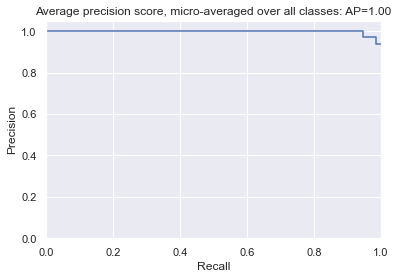

In [21]:
plt.figure()
plt.step(recall['micro'], precision['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

### 1.12.2.2. MultiOutputClassifier
Multilabel classification support can be added to any classifier with MultiOutputClassifier. This strategy consists of fitting one classifier per target. This allows multiple target variable classifications. The purpose of this class is to extend estimators to be able to estimate a series of target functions (f1,f2,f3…,fn) that are trained on a single X predictor matrix to predict a series of responses (y1,y2,y3…,yn).

In [22]:
from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
X, y1 = make_classification(n_samples=10, n_features=100, n_informative=30, n_classes=3, random_state=1)
y2 = shuffle(y1, random_state=1)
y3 = shuffle(y1, random_state=2)
Y = np.vstack((y1, y2, y3)).T

In [23]:
import pandas as pd
pd.DataFrame(X).head()
pd.DataFrame(Y).head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.934327,1.566246,-1.007259,-3.083766,-4.214301,0.116987,0.417639,0.900654,3.930051,-0.650885,...,-0.261394,0.281840,0.378392,2.361206,-0.218049,-1.024215,0.128084,-0.611115,-0.186305,-0.600593
1,1.184546,-1.161732,1.555493,0.228109,1.518193,-0.278292,0.024185,0.903772,0.255854,0.645867,...,1.650885,0.450942,1.373448,-3.221724,-2.147289,1.197473,0.886817,-0.251925,1.167535,1.156090
2,-0.511789,-0.227889,-0.946340,3.394399,-0.267970,0.102156,0.873626,0.281821,1.547924,-0.260002,...,0.314574,-0.621486,0.395546,-0.264281,-0.901784,-0.626172,0.884355,1.454720,0.349456,-1.212905
3,0.699886,-0.366210,1.250980,0.535822,-0.314439,1.282986,-0.652072,1.588483,-1.559337,0.752697,...,0.137424,0.456471,0.425725,1.256563,0.485102,2.149161,0.489643,-0.780219,0.511125,1.978993
4,1.419876,0.327002,0.322211,-3.716923,-1.261130,0.160134,-0.519291,-1.093102,1.337645,0.300852,...,-0.515113,-0.546857,-0.439073,-0.366359,-0.257172,0.288652,-0.599155,0.336921,0.278922,0.294427


,0,1,2
0,2,2,0
1,1,2,1
2,2,1,0
3,0,0,2
4,0,2,1


In [24]:
n_samples, n_features = X.shape # 10,100
n_outputs = Y.shape[1] # 3
n_classes = 3

In [25]:
forest = RandomForestClassifier(random_state=1)
multi_target_forest = MultiOutputClassifier(forest, n_jobs=-1)
multi_target_forest.fit(X, Y).predict(X)

array([[2, 2, 0],
       [1, 2, 1],
       [2, 1, 0],
       [0, 0, 2],
       [0, 2, 1],
       [0, 0, 2],
       [1, 1, 0],
       [1, 1, 1],
       [0, 0, 2],
       [2, 0, 0]])

## <font color='purple'> 1.12.3. Multiclass-multioutput classification(multitask classification)
For example, classification of the properties “type of fruit” and “colour” for a set of images of fruit. The property “type of fruit” has the possible classes: “apple”, “pear” and “orange”. The property “colour” has the possible classes: “green”, “red”, “yellow” and “orange”. Each sample is an image of a fruit, a label is output for both properties and each label is one of the possible classes of the corresponding property.

In [26]:
y = np.array([['apple', 'green'], ['orange', 'orange'], ['pear', 'green']])
print(y)

[['apple' 'green']
 ['orange' 'orange']
 ['pear' 'green']]


## <font color='purple'> 1.12.4. Multioutput regression
Multioutput regression predicts multiple numerical properties for each sample. Each property is a numerical variable and the number of properties to be predicted for each sample is greater than or equal to 2. Some estimators that support multioutput regression are faster than just running n_output estimators.

For example, prediction of both wind speed and wind direction, in degrees, using data obtained at a certain location. Each sample would be data obtained at one location and both wind speed and direction would be output for each sample.

In [27]:
y = np.array([[31.4, 94], [40.5, 109], [25.0, 30]])
print(y)

[[ 31.4  94. ]
 [ 40.5 109. ]
 [ 25.   30. ]]


In [28]:
from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
X, y = make_regression(n_samples=10, n_targets=3, random_state=1)

In [29]:
pd.DataFrame(X).head()
pd.DataFrame(y).head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.760415,-0.391816,0.556074,-2.516304,-1.164008,0.636583,-0.806185,-0.183400,-1.787913,-1.154983,...,0.081768,-0.139712,-0.466155,-0.808847,0.089686,0.644354,0.361847,1.453918,0.648644,0.853282
1,0.109403,-1.233121,1.956079,0.080927,-0.586524,-0.700399,0.201830,-0.254180,-1.674196,-1.305727,...,-0.733272,-1.525680,-0.955425,0.623362,-0.890556,1.543359,0.825030,-0.297362,0.284748,0.106223
2,-0.826097,-0.618037,-0.599805,-0.533020,-0.661344,-0.237942,1.122328,-1.755926,-2.506441,-1.175983,...,0.324274,0.939169,-0.035368,0.654580,-0.694694,-0.468674,-2.114164,0.794528,0.515074,-0.557495
3,0.502494,-0.012665,-0.249370,1.129484,-0.384054,-0.267888,-0.396754,0.230095,1.659802,0.617203,...,-1.396496,1.252868,-0.620001,-0.172428,-0.761207,-0.504466,0.742044,0.077340,1.131629,-0.754398
4,-0.680852,0.915499,1.555016,-0.999427,-0.563237,-0.017818,0.571805,0.164665,0.394428,1.021248,...,0.098112,0.171957,0.494342,1.152599,1.851438,-1.711168,0.725523,0.578464,0.265642,-0.977773


,0,1,2
0,-154.759251,-147.040082,-50.039113
1,7.121962,5.129472,-81.462711
2,-187.900829,-100.447527,13.892614
3,-141.630651,95.031546,-191.486344
4,97.034315,165.352688,139.524524


In [30]:
MultiOutputRegressor(GradientBoostingRegressor(random_state=0)).fit(X, y).predict(X)

array([[-154.75474165, -147.03498585,  -50.03812219],
       [   7.12165031,    5.12914884,  -81.46081961],
       [-187.8948621 , -100.44373091,   13.88978285],
       [-141.62745778,   95.02891072, -191.48204257],
       [  97.03260883,  165.34867495,  139.52003279],
       [ 123.92529176,   21.25719016,   -7.84253   ],
       [-122.25193977,  -85.16443186, -107.12274212],
       [ -30.170388  ,  -94.80956739,   12.16979946],
       [ 140.72667194,  176.50941682,  -17.50447799],
       [ 149.37967282,  -81.15699552,   -5.72850319]])

# END